### Name Payam Taebi
### StudentId 400104867

# Librarires

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing

# Load Dataset

In [12]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [13]:
# Custom KMeans class
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X):
        np.random.seed(42)
        initial_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[initial_indices]

        for _ in range(self.max_iter):
            clusters = self._assign_clusters(X)
            new_centroids = self._compute_centroids(X, clusters)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X, clusters):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k] = np.mean(X[clusters == k], axis=0)
        return centroids

    def predict(self, X):
        return self._assign_clusters(X)

    def inertia(self, X):
        clusters = self._assign_clusters(X)
        total_inertia = 0
        for k in range(self.n_clusters):
            cluster_points = X[clusters == k]
            total_inertia += np.sum((cluster_points - self.centroids[k]) ** 2)
        return total_inertia

# Use elbow method and silhouette method to choose optimal cluster numbers

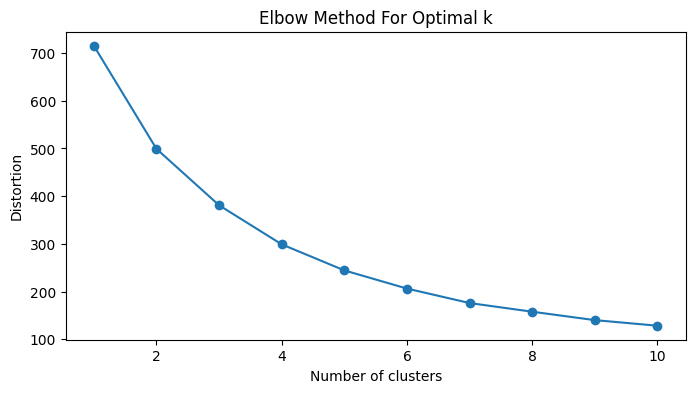

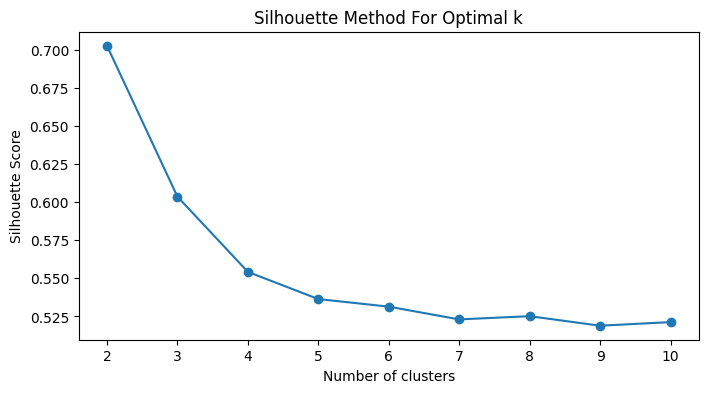

In [14]:
# Elbow Method
def elbow_method(X, max_clusters):
    distortions = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        kmeans.fit(X)
        clusters = kmeans.predict(X)
        centroid_dists = np.min(np.linalg.norm(X[:, np.newaxis] - kmeans.centroids, axis=2), axis=1)
        distortions.append(np.sum(centroid_dists) / X.shape[0])
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

# Silhouette Method
def silhouette_method(X, max_clusters):
    silhouette_avgs = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, max_iter=1000)
        kmeans.fit(X)
        clusters = kmeans.predict(X)
        silhouette_avg = silhouette_score(X, clusters)
        silhouette_avgs.append(silhouette_avg)
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters+1), silhouette_avgs, marker='o')
    plt.title('Silhouette Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Determine optimal number of clusters
max_clusters = 10
elbow_method(x_data, max_clusters)
silhouette_method(x_data, max_clusters)


# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

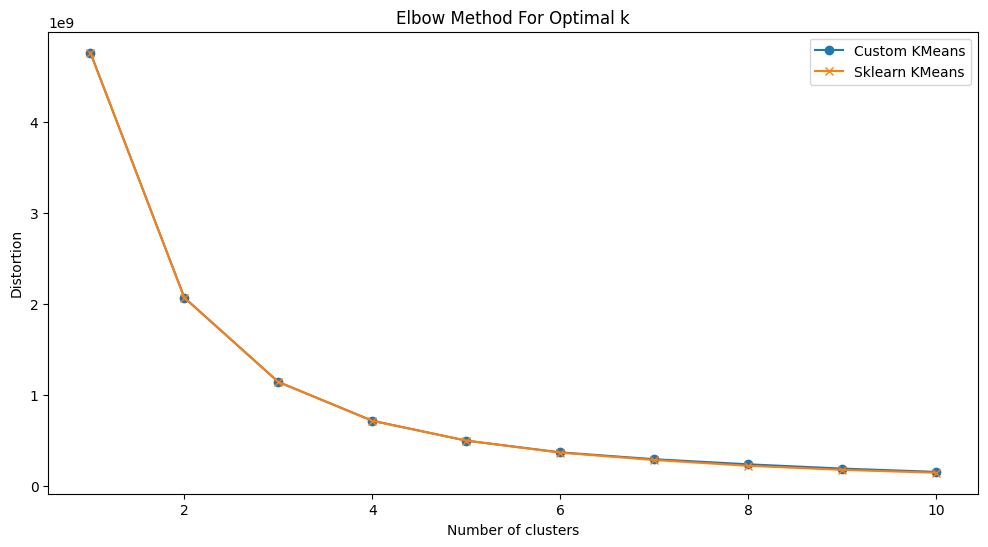

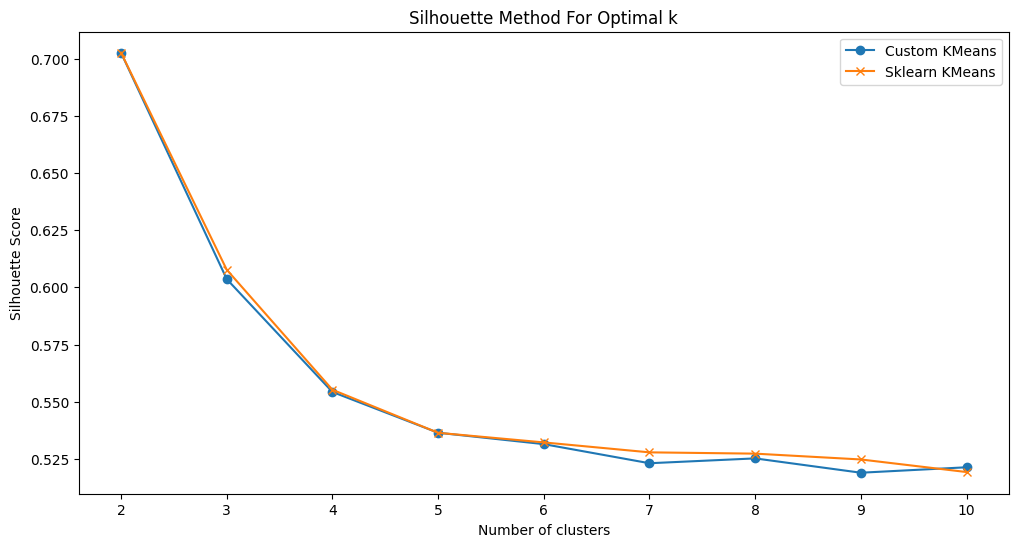

Distortions (Custom KMeans): [4759997891.450008, 2067271758.0341218, 1141760646.0051742, 715294386.5453182, 496637831.74916506, 367664639.7078241, 292218361.98527336, 236115728.03422943, 189362317.9976995, 152998792.26448706]
Distortions (Sklearn KMeans): [4759997891.450006, 2067271758.0341225, 1140879593.2960541, 714110317.1965835, 496648786.10453284, 364198320.86010814, 283302330.46747637, 220037982.76462573, 175181966.72686628, 143647678.19276106]
Silhouette Scores (Custom KMeans): [0.7026329505991734, 0.6036281302152345, 0.5542624450223365, 0.5364272582971109, 0.5314469964174443, 0.5230881799397114, 0.5252047501403453, 0.5189396233839546, 0.5213199438572041]
Silhouette Scores (Sklearn KMeans): [0.7026329505991734, 0.6077224379132485, 0.5552331273510149, 0.5363941604011884, 0.5321967583381392, 0.5278480508813674, 0.5272855591216233, 0.5247389759489455, 0.5192378190100784]


In [16]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method comparison
def elbow_method_comparison(X, max_clusters):
    distortions_custom = []
    distortions_sklearn = []
    for k in range(1, max_clusters + 1):
        # Custom KMeans
        kmeans_custom = KMeans(n_clusters=k, max_iter=1000)
        kmeans_custom.fit(X)
        distortions_custom.append(kmeans_custom.inertia(X))

        # Sklearn KMeans
        kmeans_sklearn = SklearnKMeans(n_clusters=k, max_iter=1000, random_state=42, n_init=10)
        kmeans_sklearn.fit(X)
        distortions_sklearn.append(kmeans_sklearn.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(range(1, max_clusters + 1), distortions_custom, marker='o', label='Custom KMeans')
    plt.plot(range(1, max_clusters + 1), distortions_sklearn, marker='x', label='Sklearn KMeans')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.legend()
    plt.show()

    return distortions_custom, distortions_sklearn

# Silhouette Method comparison
def silhouette_method_comparison(X, max_clusters):
    silhouette_avgs_custom = []
    silhouette_avgs_sklearn = []
    for k in range(2, max_clusters + 1):
        # Custom KMeans
        kmeans_custom = KMeans(n_clusters=k, max_iter=1000)
        kmeans_custom.fit(X)
        clusters_custom = kmeans_custom.predict(X)
        silhouette_avg_custom = silhouette_score(X, clusters_custom)
        silhouette_avgs_custom.append(silhouette_avg_custom)

        # Sklearn KMeans
        kmeans_sklearn = SklearnKMeans(n_clusters=k, max_iter=1000, random_state=42, n_init=10)
        clusters_sklearn = kmeans_sklearn.fit_predict(X)
        silhouette_avg_sklearn = silhouette_score(X, clusters_sklearn)
        silhouette_avgs_sklearn.append(silhouette_avg_sklearn)

    plt.figure(figsize=(12, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_avgs_custom, marker='o', label='Custom KMeans')
    plt.plot(range(2, max_clusters + 1), silhouette_avgs_sklearn, marker='x', label='Sklearn KMeans')
    plt.title('Silhouette Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

    return silhouette_avgs_custom, silhouette_avgs_sklearn

# Compare using elbow and silhouette methods
max_clusters = 10
distortions_custom, distortions_sklearn = elbow_method_comparison(x_data, max_clusters)
silhouette_custom, silhouette_sklearn = silhouette_method_comparison(x_data, max_clusters)

print("Distortions (Custom KMeans):", distortions_custom)
print("Distortions (Sklearn KMeans):", distortions_sklearn)
print("Silhouette Scores (Custom KMeans):", silhouette_custom)
print("Silhouette Scores (Sklearn KMeans):", silhouette_sklearn)


### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

## Optimal Cluster Number Analysis

### Elbow Method

The Elbow Method identifies the optimal number of clusters by observing the point where the distortion (sum of squared distances) starts to level off, indicating diminishing returns as more clusters are added.

Custom KMeans Distortions = [4759997891.450008, 2067271758.0341218, 1141760646.0051742, 715294386.5453182, 496637831.74916506, 367664639.7078241, 292218361.98527336, 236115728.03422943, 189362317.9976995, 152998792.26448706]


Sklearn KMeans Distortions = [4759997891.450006, 2067271758.0341225, 1140879593.2960541, 714110317.1965835, 496648786.10453284, 364198320.86010814, 283302330.46747637, 220037982.76462573, 175181966.72686628, 143647678.19276106]


### Elbow Point Analysis

Both methods show a significant drop in distortion values when increasing the number of clusters from 1 to 3 or 4. After 4 clusters, the reduction in distortion becomes less pronounced.

**Optimal Clusters (Elbow Method):** The "elbow" is typically found around 3 to 4 clusters for both methods.

### Silhouette Method

The Silhouette Method assesses clustering quality by measuring how similar each point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

Custom KMeans Silhouette Scores = [0.7026329505991734, 0.6036281302152345, 0.5542624450223365, 0.5364272582971109, 0.5314469964174443, 0.5230881799397114, 0.5252047501403453, 0.5189396233839546, 0.5213199438572041]


Sklearn KMeans Silhouette Scores = [0.7026329505991734, 0.6077224379132485, 0.5552331273510149, 0.5363941604011884, 0.5321967583381392, 0.5278480508813674, 0.5272855591216233, 0.5247389759489455, 0.5192378190100784]


### Silhouette Score Analysis

Silhouette scores peak at 2 clusters for both methods, with scores decreasing as the number of clusters increases, indicating that the initial clusters are well-defined.

**Optimal Clusters (Silhouette Method):** 2 clusters based on the peak silhouette scores.

### Combined Analysis

- **Elbow Method:** Suggests 3 or 4 clusters as optimal where the distortion curve starts to flatten.
- **Silhouette Method:** Indicates 2 clusters as the optimal number based on peak silhouette scores.

### Differences and Explanation

- **Custom KMeans and Sklearn KMeans** both suggest similar trends:
  - **Elbow Method:** Optimal clusters are around 3 to 4.
  - **Silhouette Method:** Optimal clusters are 2.
- **Algorithmic Optimizations:** Sklearn's KMeans may have more refined optimizations for centroid initialization and convergence.
- **Implementation Details:** Differences in convergence criteria, handling of numerical stability, or iterations could impact the final clustering quality.

### Conclusion

**For Practical Application:**
- 3 or 4 clusters might be better for balancing compactness and distinctiveness (Elbow Method).
- 2 clusters might be preferable for high internal cohesion and separation (Silhouette Method).


### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

## Elbow Method

**Advantages:**
- **Simple to Implement:** It involves plotting the sum of squared distances (distortion or inertia) against the number of clusters and looking for a point where the rate of decrease sharply slows down (forming an "elbow").
- **Intuitive Interpretation:** Provides a clear visual cue to select \( k \) based on where the distortion value starts to level off.

**Disadvantages:**
- **Dependent on Dataset:** The "elbow" may not always be clearly defined or may not exist, especially if the plot is smooth or lacks a distinct change in slope.
- **May not Capture Complex Structures:** It may not be effective for datasets with non-convex clusters or varying densities.

## Silhouette Method

**Advantages:**
- **Quantitative Measure:** Calculates a silhouette score for each data point, providing a measure of how similar it is to its own cluster compared to other clusters.
- **Objective Criterion:** Offers a more rigorous statistical method to evaluate clustering quality.
- **Works with Varying Cluster Shapes:** Handles clusters of arbitrary shapes and sizes better than the elbow method.

**Disadvantages:**
- **Computationally Intensive:** Requires computing pairwise distances between all data points, which can be costly for large datasets.
- **Interpretation:** While silhouette scores provide quantitative assessment, interpreting the scores and deciding on the optimal \( k \) can still be subjective.

## Conclusion

**Preference:** The silhouette method is generally preferred when:
- The dataset is complex with non-convex clusters.
- A quantitative measure of cluster quality is required.
- There is no clear elbow in the distortion plot or when the elbow method fails to provide a distinct \( k \).

**Considerations:** However, the choice ultimately depends on the specific characteristics of your data and the goals of your analysis. It can be beneficial to use both methods in conjunction or to cross-validate results to ensure robustness in determining the optimal number of clusters \( k \).
